# Đề Thực hành 4 Phương pháp toán cho Trí tuệ nhân tạo.
### Phần: Xác suất và ứng dụng.

- MSSV: 21120511
- Họ và tên: Lê Nguyễn

### Bài 1. (3 điểm)
Khảo sát việc chọn ngành của sinh viên một lớp SV năm 2 của ĐH Khoa học tự nhiên, giáo viên chủ nhiệm có bảng bên dưới

|Ngành     | Nam    | Nữ         | Tổng   |
|----------|--------|------------|--------|
| **Khoa học máy tính** | 10     | 15     | **25** |
| **Kỹ thuật phần mềm** | 21     | 5      | **26** |
| **Khoa học dữ liệu**  | 11     | 10      | **21** |
| **Hệ thống thông tin**| 14     |   4    | **18** | 

1) Chọn ngẫu nhiên một sinh viên và biết rằng đó là sinh viên nam, tính xác suất để sinh viên đó học Khoa học máy tính.

2) Chọn ngẫu nhiên hai sinh viên, tính xác suất để hai sinh viên đó cùng học ngành khoa học dữ liệu.
   
3) Hỏi từ bảng trên, ta có thể thực hiện phân tích tương quan theo tham số covariance giữa đại lượng: ngành học & giới tính được hay không? Vì sao?

4) Giả sử thầy L chọn một sinh viên của lớp đi thi Olympic, còn thầy S lại chọn một sinh viên đi nghiên cứu khoa học (khác sinh viên ở trên). Hỏi hai biến cố thu được có độc lập nhau không? Vì sao?

1. Xác suất chọn một sinh viên nam học Khoa học máy tính là: 0.17857142857142858
2. Xác suất chọn 2 sinh viên cùng học Khoa học dữ liệu là: 0.052434456928838954
3.


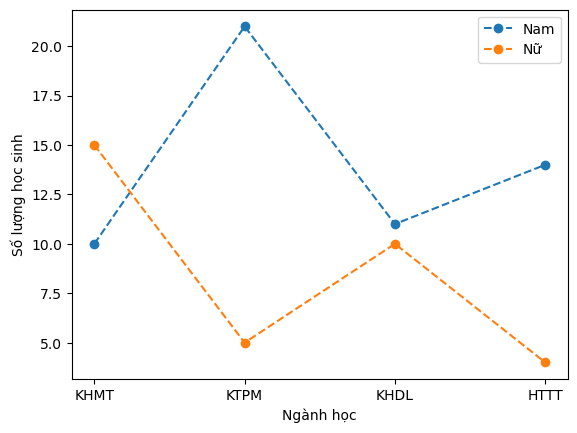

In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

data = pd.DataFrame(data = np.array([[10, 15], [21, 5], [11, 10], [14, 4]]),
                    index = ["KHMT", "KTPM", "KHDL", "HTTT"],
                    columns= ["Nam", "Nữ"])

# 1.
P_1 = data["Nam"]["KHMT"] / sum(data["Nam"])
print(f"1. Xác suất chọn một sinh viên nam học Khoa học máy tính là: {P_1}")

# 2.
total_sv = sum(data["Nam"] + data["Nữ"])
total_khdl = data.loc["KHDL"]["Nam"] + data.loc["KHDL"]["Nữ"]
print(f"2. Xác suất chọn 2 sinh viên cùng học Khoa học dữ liệu là: {(total_khdl * (total_khdl - 1))/(total_sv * (total_sv - 1))}")

# 3.
print("3.")

plt.plot(data["Nam"], "o--", label = "Nam")
plt.plot(data["Nữ"], "o--", label = "Nữ")
plt.xlabel("Ngành học")
plt.ylabel("Số lượng học sinh")
plt.legend()
plt.show()

#### Câu 4:

### Bài 2. (2 điểm)
1) Bằng các công thức đã biết, hãy tính kỳ vọng, phương sai, mode của đại lượng ngẫu nhiên rời rạc $X$ được cho trong bảng bên dưới.

|X         | 1    | 2    | 3    |  5   |   8  | 13    |  21 |
|----------|------|------|------|-------|-------|-------|-------|
| **P(X)** | 1/20 | 4/20 | 6/20 | 2/20  | 4/20  |  1/20 |  2/20 | 

In [1]:
import numpy as np

X = np.array([1, 2, 3, 5, 8, 13, 21])
P_X = np.array([1/20, 4/20, 6/20, 2/20, 4/20, 1/20, 2/20])

# ki vong cua X
E = np.dot(X, P_X)
print(f"Kỳ vọng E(X): {E}")

# phuong sai cua X
Var = np.dot(X**2, P_X) - E**2
print(f"Phương sai Var(X): {Var}")

# mode cua x
print(f"Mode của X: {X[P_X == P_X.max()][0]}")

Kỳ vọng E(X): 6.2
Phương sai Var(X): 32.96
Mode của X: 3


2) Cho bảng phân phối xác suất của đại lượng ngẫu nhiên rời rạc $X$ có phương sai $Var(X)=7.3$ như bên dưới, trong đó $a,b$ là các số thực thuộc $[0;1].$ Tính kỳ vọng $E(X).$

|X         | 1    | 2    | 4    | 7    |  9   |
|----------|------|------|------|------|------|
| **P(X)** | 0.1  | *a*  |  *b* | 0.2  |  0.2 |

- Đầu tiên ta có:
$$
\begin{aligned}
E[X] &= 1 \cdot 0.1 + 2 \cdot a + 4 \cdot b + 7 \cdot 0.2 + 9 \cdot 0.2 = 2a + 4b + 3.3 \\
E[X^2] &= 1^2 \cdot 0.1 + 2^2 \cdot a + 4^2 \cdot b + 7^2 \cdot 0.2 + 9^2 \cdot 0.2 =  4a + 16b + 26.1
\end{aligned}
$$

- Tiếp theo ta có:
$$
\begin{aligned}
Var[X] &= E[X^2] - (E[X])^2 \\
&= 4a + 16b + 26.1 - (2a + 4b + 3.3)^2 \\
&= 4a + 16b + 26.1 - (4a^2 + 16b^2 + 10.89 + 16ab + 13.2a + 26.4b) \\
&= -4a^2 - 16b^2 - 16ab -9.2a -10.4b + 15.21 \\
&= 7.3
\end{aligned}
$$

- Mà:
$$
0.1 + a + b + 0.2 + 0.2 = 1 \implies a + b = 0.5
$$ 

- Vì vậy ta cần giải hệ phương trình:
$$
\begin{cases}
a + b = 0.5 \\
-4a^2 - 16b^2 - 16ab -9.2a -10.4b + 15.21 = 7.3 \\
\end{cases}
$$

- Cuối cùng ta sẽ dùng sympy để giải và tìm nghiệm của hệ phương trình.

In [4]:
import sympy as sp
import numpy as np
from typing import List

# tìm a, b
x, y = sp.symbols('x, y')

f1 = sp.Eq(x + y, 0.5) # a + b = 0.5
f2 = sp.Eq(-4*(x**2) - 16*(y**2) - 16*x*y - 9.2*x - 10.4*y + 15.21, 7.3)

def Solve(f1, f2) -> List[float]:
    ans = sp.solve((f1, f2), (x, y))

    result = []
    for i, j in ans:
        if (0 <= i <= 1) and (0 <= j <= 1):
            result = result + [i, j]

    return result

a, b = Solve(f1, f2)

print(f"a = {a} và b = {b}")

# tìm kỳ vọng
X = np.array([1, 2, 4, 7, 9])
P_X = np.array([0.1, x, y, 0.2, 0.2])

f3 = np.dot(X, P_X)

print(f"Kỳ vọng cần tìm là: {f3.subs({x: a, y: b})}")

a = 0.150000000000000 và b = 0.350000000000000
Kỳ vọng cần tìm là: 5.00000000000000


### Bài 3. (2.5 điểm, mỗi ý 0.25đ, làm đúng hết thì +0.25đ)
Hãy giải quyết các tình huống sau đây, sử dụng các thư viện xác suất của Python (trình bày ngắn gọn):

1. Tỷ lệ sút bóng penalty thành công của cầu thủ Minh Đạt là $0.7.$ Trong lúc luyện tập trước mùa giải sinh viên ngành AI, Đạt đã tập sút tất cả $16$ lần và ký hiệu $X$ là số lần bạn đã sút thành công. <br>
 - Hãy xác định loại phân bố xác suất của $X$ và tính kỳ vọng, phương sai của $X$. 
 - Tính xác suất để Đạt sút thành công đúng $12$ lần.
 - Tính xác suất để Đạt sút thành công không quá $10$ lần.

#### Bài làm

Do việc sút Penalty chỉ có 2 khả năng là vào hoặc không vào nên ta sẽ chọn phân bố xác suất cho $X$ là phân phối nhị thức với $n$ là số lần sút, vậy $n = 16$ và $p$ là xác suất thành công, vậy $p = 0.7$.
$$
X \sim B(16, 0.7)
$$

In [23]:
from scipy.stats import binom

n, p = 16, 0.7

mean, var = binom.stats(n, p)

print(f"Kỳ vọng của X là: {mean}")
print(f"Phương sai của X là: {var}")
print(f"Xác suất Đạt sút thành công đúng 12 lần là: {binom.pmf(12, n, p)}")

# Do sút thành công không quá 10 lần, nghĩa là P(X <= 10) do đó ta sẽ dùng cdf của binom
print(f"Xác suất Đạt sút thành công không quá 10 lần là: {binom.cdf(10, n, p)}")

Kỳ vọng của X là: 11.2
Phương sai của X là: 3.3600000000000003
Xác suất Đạt sút thành công đúng 12 lần là: 0.20404825591714243
Xác suất Đạt sút thành công không quá 10 lần là: 0.34021767408889236


2. Để hoàn tất hồ sơ xin việc, anh Lê Nguyễn cần thi đạt chứng chỉ lái xe B1. Giả sử xác suất thi đậu của anh Lê Nguyễn là $0.83$ và anh sẽ thi đến khi nào đậu thì thôi. Gọi $X$ là số lần thi của anh ấy. <br>
 - Hãy xác định loại phân bố xác suất của $X$ và tính kỳ vọng, phương sai của $X$.
 - Tính xác suất để anh Nguyễn thi đậu ngay lần đầu tiên.
 - Tính xác suất để anh Nguyễn thi đậu sau ít nhất $4$ lần.

#### Bài làm

Ta có thể thấy anh Lê Nguyễn thực hiện liên tục cho đến khi nào thành công thì phân bố xác suất hợp lý nhất sẽ là phân phối hình học. Ta xem $p$ là xác suất thành công, vậy $p = 0.83$ và:
$$
X \sim \text{Geo}(0.83)
$$

In [22]:
from scipy.stats import geom

p = 0.83

mean, var = geom.stats(p)

print(f"Kỳ vọng của X là: {mean}")
print(f"Phương sai của X là: {var}")

# thi đậu ngay lần đầu tiên tức là P(X = 1)
print(f"Xác suất để anh Nguyễn thi đậu ngay lần đầu tiên là: {geom.pmf(1, p)}")

# thi đậu sau ít nhất 4 lần nghĩa là P(X >= 4) = 1 - P(X < 4) = 1 - P(X <= 3)
print(f"Xác suất để anh Nguyễn thi đậu sau ít nhất 4 lần là: {1 - geom.cdf(3, p)} ")

Kỳ vọng của X là: 1.2048192771084338
Phương sai của X là: 0.24677021338365518
Xác suất để anh Nguyễn thi đậu ngay lần đầu tiên là: 0.83
Xác suất để anh Nguyễn thi đậu sau ít nhất 4 lần là: 0.004913000000000056 


3. Mỗi buổi trưa, quán Cơm gà xối mỡ của làng ĐH bận rộn phục vụ các sinh viên và trung bình cứ $1$ phút thì có $2$ sinh viên vào ăn. Giả sử các sinh viên xuất hiện ngẫu nhiên độc lập với nhau và gọi $X$ là số sinh viên đến quán. <br>
 - Hãy xác định loại phân bố xác suất phù hợp nhất của $X$ và tính kỳ vọng, phương sai của $X$.
 - Xác suất để trong $1$ phút $30$ giây, không có sinh viên nào đến ăn.
 - Xác suất để trong $15$ phút, quán cơm có phục vụ cho $20$ đến $25$ sinh viên.

#### Bài làm

Do ta muốn tìm hiểu xem xác suất của số sinh viên đến quán trong khoảng thời gian nhất định nên phân bố xác suất phù hợp nhất chính là phân phối Poisson. Vậy:
$$
X \sim \text{Pois}(\lambda)
$$

Do không xét trong một khoảng thời gian nên $\lambda$ chính là số sinh viên đến ăn 1 phút, do đó $\lambda = 2$. Mà $X$ có phân phối Poisson, vậy:
$$
E[X] = Var[X] = \lambda = 2
$$

In [3]:
from scipy.stats import poisson

r = 2

# Cứ mỗi 1 phút sẽ có 2 sinh viên vào ăn thì ta kỳ vọng trong 1 phút 30 giây sẽ có 2 * 1.5 = 3 sinh viên vào ăn, vậy lambda = 3
print(f"Xác suất để trong 1 phút 30 giây không có sinh viên nào đến ăn là: {poisson.pmf(0, r*1.5)} ")

# Cứ mỗi 1 phút sẽ có 2 sinh viên thì ta kỳ vọng trong 15 phút sẽ có 2 * 15 = 30 sinh viên, vậy lambda = 30
# Xác suất phục vụ từ 20 đến 25 tức là P(20 <= X <= 25) = P(X <= 25) - P(X < 20) = P(X <= 25) - P(X <= 19)
print(f"Xác suất để trong 15 phút, quán cơm phục vụ từ 20 đến 25 sinh viên là: {poisson.cdf(25, r*15) - poisson.cdf(19, r*15)}")

Xác suất để trong 1 phút 30 giây không có sinh viên nào đến ăn là: 0.049787068367863944 
Xác suất để trong 15 phút, quán cơm phục vụ từ 20 đến 25 sinh viên là: 0.18648389622594205


### Bài 4. (1.5 điểm)
Cho vector ngẫu nhiên rời rạc $(X,Y)$ có bảng phân bố xác suất như bên dưới ($\Omega_X = \{1,4\}, \Omega_Y = \{1,3,5\}$). Hãy trả lời các câu hỏi sau

|X & Y     | 1    | 3     | 5    |
|----------|------|-------|------|
| **1**    | 0.15 | 0.25   | 0.1 | 
| **4**    | 0.05  | 0.3   | 0.15  |

1) Tính các phân phối lề theo từng biến. Từ đó tính $P(X=4 | Y = 3).$ <br>

2) Tính $cov(X,Y)$ và hệ số tương quan giữa $X,Y$ bằng các thư viện thích hợp. Từ đó cho biết $X,Y$ có độc lập không? <br>

In [1]:
import numpy as np
import pandas as pd
from math import sqrt

data = pd.DataFrame(data = np.array([[0.15, 0.25, 0.1], [0.05, 0.3, 0.15]]), 
                    index = [1, 4], 
                    columns = [1, 3, 5])

p_y = data.sum(0) # phân phối lề của y
p_x = data.sum(1) # phân phối lề của x

# Câu 1
print("1.")
print(f"Phân phối lề của X là: {p_x.values}")
print(f"Phân phối lề của Y là: {p_y.values}")

# ta có P(X = 4 | Y = 3) = P(X = 4, Y = 3) / P(Y = 3)
print(f"P(X = 4 | Y = 3) = {data[3][4] / p_y[3]}")

# Câu 2
print("2.")

E_x = sum(data.index.T @ data)
E_y = sum(data @ data.columns)
E_xy = data.index.T @ data @ data.columns
# E_x = np.dot(data.index.T, p_x)
# E_y = np.dot(p_y, data.columns)

print(f"E[X] = {E_x}")
print(f"E[Y] = {round(E_y, 2)}")
print(f"E[XY] = {E_xy}")

Cov_xy = E_xy - (E_x * E_y)
print(f"Cov(X, Y) = {round(Cov_xy, 2)}")
print(f"Do Cov(X, Y) khác không nên X và Y không độc lập với nhau")

E_x2 = sum((data.index ** 2).T @ data)
E_y2 = round(sum(data @ (data.columns ** 2)), 2)

# Phương sai
Var_x = E_x2 - E_x**2
Var_y = E_y2 - E_y**2

# Độ lệch chuẩn
Sd_x = sqrt(Var_x)
Sd_y = sqrt(Var_y)

print(f"Corr(X, Y) = {round(Cov_xy / (Sd_x * Sd_y),2)}")

1.
Phân phối lề của X là: [0.5 0.5]
Phân phối lề của Y là: [0.2  0.55 0.25]
P(X = 4 | Y = 3) = 0.5454545454545454
2.
E[X] = 2.5
E[Y] = 3.1
E[XY] = 8.2
Cov(X, Y) = 0.45
Do Cov(X, Y) khác không nên X và Y không độc lập với nhau
Corr(X, Y) = 0.22


### Bài 5. (1 điểm) Trong hai chọn một.
1) Một SV tham gia thi hai kỳ thi *TOEIC Nghe - Đọc* và *TOEIC Nói - Viết* để lấy chứng chỉ xét tốt nghiệp. Biết rằng:
- Xác suất để đủ điểm Nghe - Đọc là $3/5.$ 
- Nếu đủ điểm Nghe - Đọc thì xác suất SV đó đủ điểm Nói - Viết là $4/5$. 
- Nếu Nghe - Đọc không đủ điểm thì xác suất SV đó đủ điểm Nói - Viết là $2/5.$

Gọi $X$ là biến ngẫu nhiên cho biết số kỳ thi mà SV đó có thể đủ điểm. Tìm phân bố xác suất của $X$.

2) Phân phối nhị thức âm (negative binomial distribution) với tham số $r, p$ có thể xem là một dạng mở rộng của phân phối hình học, trong đó biến ngẫu nhiên $X$ là số lần thử (với xác suất thành công là $p$) cần để đạt được $r$ lần thành công. Ở phân phối hình học thì $r=1.$ Khi đó: $X \sim Neg(r,p)$ thì $$f(X=k) = C_{k - 1}^{r-1} \cdot p^r \cdot (1-p)^{k-r}.$$

Hãy giải bài toán sau đây: Một người đánh cờ có xác suất thắng là $p > 0.5$, biết rằng người này chơi đến khi nào đạt được $10$ trận thắng thì thôi. Biết rằng xác suất để người này đánh đến ván $20$ là $0.0154$, tìm $p$.

#### Bài 1

- Đặt $A$ là biến cố mà sinh viên đủ điểm Nghe - Đọc, ta có $\mathbb{P}(A) = 3/5$. Vậy xác suất mà sinh viên không đủ điểm Nghe-Đọc là $\mathbb{P}(A^c) = 1 - \mathbb{P}(A) = 2/5$.

- Đặt $B$ là biến cố mà sinh viên đủ điểm Nói - Viết, theo đề bài ta có:
$$
\begin{aligned}
\mathbb{P}(B \mid A) &= 4/5 \\
\mathbb{P}(B \mid A^c) &= 2/5 \\
\end{aligned}
$$

- Ta thấy $A \cap A^c = \emptyset$ (xung khắc với nhau) và $A \cup A^c = \Omega$ (không gian mẫu), do đó $\{A, A^c\}$ là một phân hoạch của $\Omega$. Vậy áp dụng công thức xác suất đầy đủ, ta được:
$$
\begin{aligned}
\mathbb{P}(B) &= \mathbb{P}(B \mid A)\mathbb{P}(A) + \mathbb{P}(B \mid A^c)\mathbb{P}(A^c) \\
&= (4/5)(3/5) + (2/5)(2/5) = 16/25
\end{aligned}
$$

- Đặt $X$ là biến ngẫu nhiên đặc trưng cho số kì thi mà sinh viên có thể đủ điểm, ta thấy $X$ sẽ nhận các giá trị là $0$ (không kì thi nào đủ điểm), là $1$ (1 trong 2 đủ điểm) và $2$ (cả 2 đều đủ điểm).

- Với xác suất của $X = 2$, ta có:
$$
\begin{aligned}
\mathbb{P}(X = 2) &= \mathbb{P}(A \cap B) = \mathbb{P}(B \mid A)\mathbb{P}(A) = (4/5)(3/5) = 12/25 \\
\end{aligned}
$$

- Với xác suất của $X = 1$, ta xét:
$$
\begin{aligned}
\mathbb{P}(1 \leq X \leq 2) &= \mathbb{P}(A \cup B) = \mathbb{P}(A) + \mathbb{P}(B) - \mathbb{P}(A \cap B) =  19/25\\
\text{mà} \hspace{5pt} \mathbb{P}(1 \leq X \leq 2) &= \mathbb{P}(X = 2) + \mathbb{P}(X = 1) = 19/25 \\
\implies \hspace{5pt} \mathbb{P}(X = 1) &= 19/25 - 12/25 = 7/25
\end{aligned}
$$

- Với xác suất của $X = 0$, ta có:
$$
\mathbb{P}(X = 0) = 1 - \mathbb{P}(1 \leq X \leq 2) = 1 - (19/25) = 6/25 
$$

- Vậy phân bố xác suất của $X$ là bảng dưới đây:


| $X$             | 0    | 1    | 2     |
| -------------   | ---  | ---  | ---   |
| $\mathbb{P}(X)$ | $\dfrac{6}{25}$ | $\dfrac{7}{25}$ | $\dfrac{12}{25}$ |

#### Bài 2

- Đặt $X$ là số lần thử để người đánh cờ được 10 trận thắng. Ta có $X \sim Neg(10, p)$, vậy:
$$
\mathbb{P}(X = k) = \binom{k-1}{9} p^{10} (1-p)^{k - 10}
$$

- Theo đề bài ta có phương trình (1):
$$
\mathbb{P}(X = 20) = \binom{19}{9} p^{10} (1-p)^{10} = 0.0154
$$

In [2]:
# Đầu tiên ta có thể nhờ sự hỗ trợ của Sympy để giải phương trình trên
import sympy

k = 20
r = 10

x = sympy.Symbol('x', real = True)

f = sympy.Eq(sympy.binomial(k-1, r-1)*(x**(r))*((1-x)**(k - r)), 0.0154)

result = sympy.solve(f)

for i in result:
    if (0.5 < i <= 1.0):
        print(f"Xác suất p cần tìm là: {i}")

Xác suất p cần tìm là: 0.700029104175818


- Ở cách 2 ta sẽ giải tìm nghiệm của phương trình (1), đặt $(p - p^2)^5 = y$, ta có:
$$
\begin{aligned}
\binom{19}{9} p^{10} (1-p)^{10} &= 0.0154 \\
92378 \cdot (p(1-p))^{10} &= 0.0154 \\
((p - p^2)^5)^2 &= 0.0154 \cdot \frac{1}{92378} \\
\implies \hspace{10pt} y^2 &= 0.0154 \cdot \frac{1}{92378}
\end{aligned}
$$

- Vậy $y$ có 2 nghiệm là:
$$
\begin{cases}
y = (p - p^2)^5 &= \sqrt{0.0154 \cdot \frac{1}{92378}} \approx 0.0004083 \hspace{10pt} (2) \\
y = (p - p^2)^5 &= -\sqrt{0.0154 \cdot \frac{1}{92378}} \approx -0.0004083 \hspace{10pt} (3)
\end{cases}
$$

- Giải phương trình (2), ta được:
$$
\begin{aligned}
p - p^2 &= \sqrt[5]{0.004083} \approx 0.2099887 \\
&\implies \begin{cases}
p \approx 1.17822467 \\
p \approx -0.17822467
\end{cases}
\end{aligned}
$$

- Giải phương trình (3), ta được:
$$
\begin{aligned}
p - p^2 &= \sqrt[5]{-0.004083} \approx -0.2099887 \\
&\implies \begin{cases}
p \approx 0.7 \\
p \approx 0.299972 \\
\end{cases}
\end{aligned}
$$

- Do $0.5 < p \leq 1$ nên $p = 0.7$ thoả mãn đề bài. Vậy xác suất một người đánh cờ thằng là $0.7$.